# Przygotowanie środowiska

+ zainstalować Python
+ przygotować wirutalne środowisko: `python -m virtualenv venv`
+ zainstalować paczki (można użyć również pliku requirements.txt):  `pip install jupyterlab, matplotlib, scikit-learn`

# Generowanie danych

Zostaną wygenerowane dane w taki sposób, że punkty powyżej prostej $y=2x-1$ będą miały etykietę $1$, w.p.p. zostania nadana etykieta $0$.

In [4]:
import numpy as np


def generate_dataset(a, b):
    
    x = (np.random.rand(200) - 0.5) * 10
    N = x.shape[0]
    y = a * x + b
    
    y_mult = y + 8*y*(np.random.rand(N) - 0.5)
    
    labels = y_mult > y
    labels = np.logical_xor(np.random.choice([0, 1], size=N, p=[0.8, 0.2]), labels)
    
    return x, y_mult, labels.astype(int)

x, y, labels = generate_dataset(2, 1)

print(x[:10])
print(y[:10])
print(labels[:10])


[-4.421027    4.75444802 -1.5760654  -0.16703796  1.71701047  4.34396176
 -1.40349363 -4.92922678  1.73312384  4.31638545]
[-10.72495899  -5.71790416  -2.46318696   0.28247612   5.90574022
  11.87799027   2.81017369  19.4452009   -8.29540254  11.22141022]
[0 0 0 0 1 1 1 1 0 1]


# Wizualizacja zbioru danych

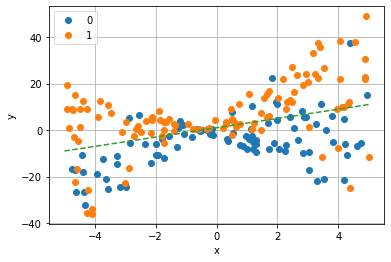

In [5]:
from matplotlib import pyplot as plt

def plot_dataset(x, y, labels):
    unique_labels = np.unique(labels)
    
    for label in unique_labels:
        x_label = x[label == labels]
        y_label = y[label == labels]
                    
        plt.plot(x_label, y_label, 'o', label=label)
    
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(unique_labels)
    
plot_dataset(x, y, labels)
x_line = np.linspace(-5,5,100)
y_line = 2*x_line+1
plt.plot(x_line, y_line, '--')

# Uczenie MLP

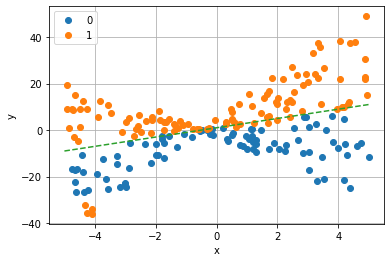

In [6]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(alpha=1, max_iter=1000)

features = np.array([x, y]).T

mlp_classifier.fit(features, labels)

labels_predicted = mlp_classifier.predict(features)

plot_dataset(x, y, labels_predicted)
plt.plot(x_line, y_line, '--')

# Metryki

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(labels, labels_predicted))
print(confusion_matrix(labels, labels_predicted))


              precision    recall  f1-score   support

           0       0.82      0.78      0.80        93
           1       0.82      0.85      0.83       107

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200

[[73 20]
 [16 91]]


# Wizualizacja procesu uczenia

/home/mochman/Projects/uam/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


<module 'matplotlib.pyplot' from '/home/mochman/Projects/uam/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

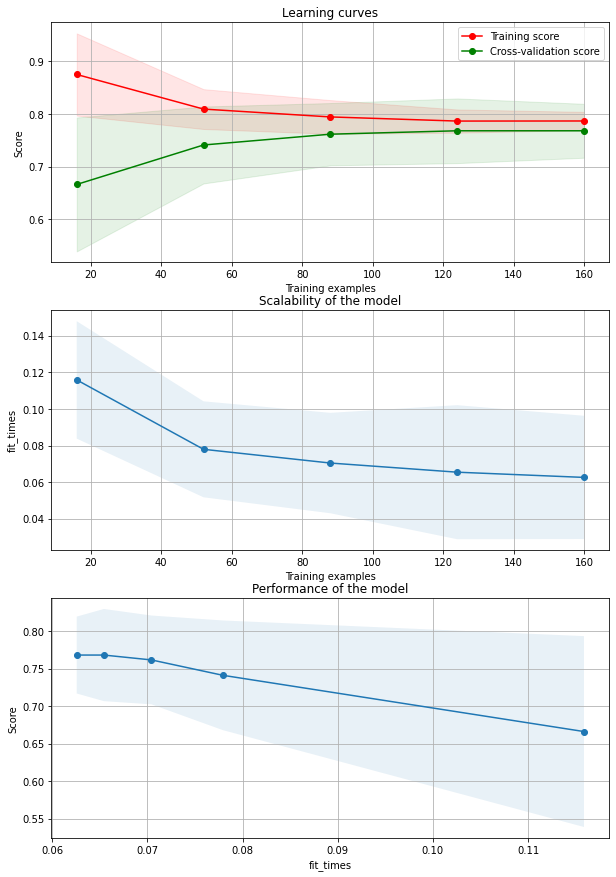

In [66]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve



def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)


plot_learning_curve(mlp_classifier, 'Learning curves', features, labels, axes, cv=cv, n_jobs=4)